# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
print(df.shape)
df.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [9]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [11]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
mask1 = df["Mouse ID"] == "g989"
df.loc[mask1]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask1 = df["Mouse ID"] != "g989"
df2 = df.loc[mask1].reset_index(drop=True)
df2.shape

(1880, 8)

In [15]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tum_mean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tum_median = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tum_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

data = {
    "Tumor Average": tum_mean,
    "Tumor Median": tum_median,
    "Tumor SEM": tum_sem
}

leaderboard = pd.DataFrame(data).reset_index()
leaderboard

,Drug Regimen,Tumor Average,Tumor Median,Tumor SEM
0,Capomulin,40.675741,41.557809,0.329346
1,Ceftamin,52.591172,51.776157,0.469821
2,Infubinol,52.884795,51.820584,0.492236
3,Ketapril,55.235638,53.698743,0.603860
4,Naftisol,54.331565,52.509285,0.596466
5,Placebo,54.033581,52.288934,0.581331
6,Propriva,52.320930,50.446266,0.544332
7,Ramicane,40.216745,40.673236,0.320955
8,Stelasyn,54.233149,52.431737,0.573111
9,Zoniferol,53.236507,51.818479,0.516398


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

col_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
ledbrd2 = df2.groupby(["Drug Regimen"]).agg(col_agg).reset_index()
ledbrd2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

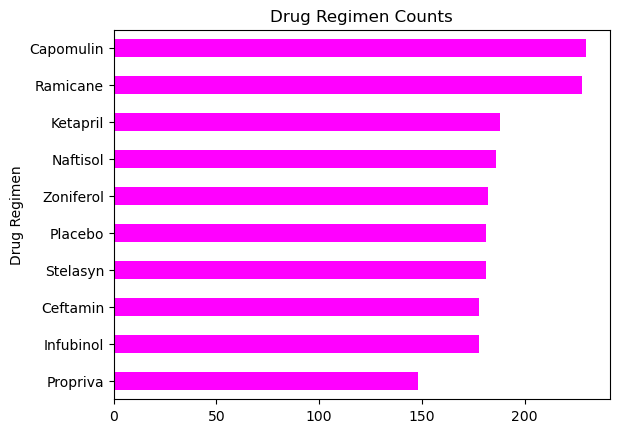

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="fuchsia")
plt.show()

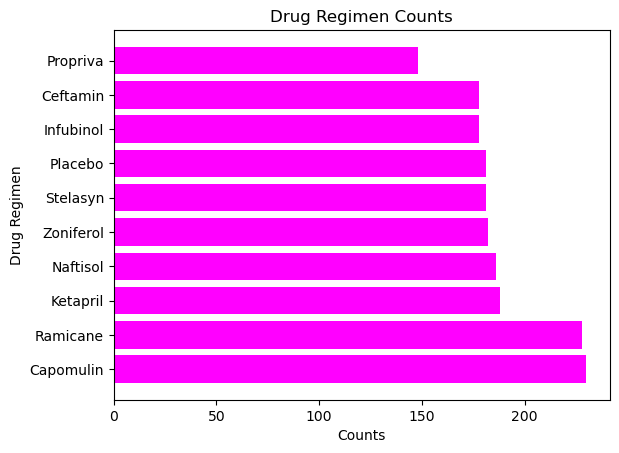

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

data = df2["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)

plt.barh(x, y, color="fuchsia")
plt.xlabel("Counts")
plt.ylabel("Drug Regimen")
plt.title("Drug Regimen Counts")


plt.show()

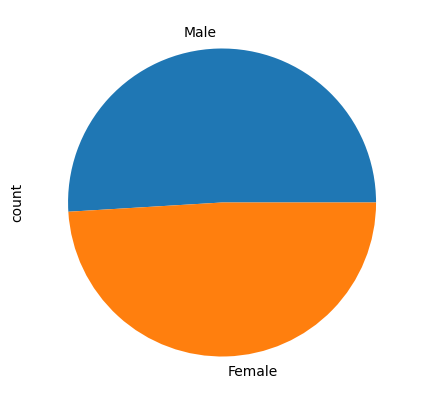

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2["Sex"].value_counts()
plot = df2["Sex"].value_counts().plot.pie(y="sex", figsize=(5, 5))

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [42]:
import seaborn as sns

<Axes: xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

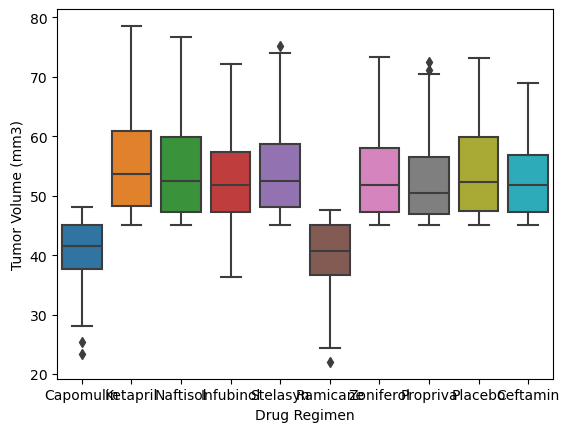

In [43]:
sns.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")

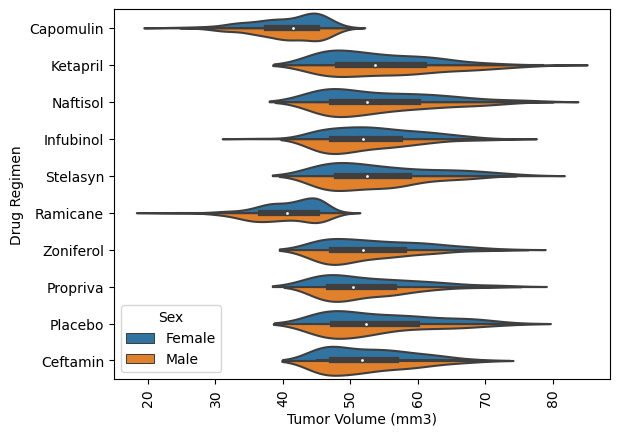

In [44]:
sns.violinplot(data=df2, y="Drug Regimen", x="Tumor Volume (mm3)", hue="Sex", split=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [46]:
df3 = df2.groupby("Mouse ID").Timepoint.max().reset_index()
sub = df2.loc[:, ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)", "Sex"]] # subsetting columns we care about

df3 = pd.merge(df3, sub, on=["Mouse ID", "Timepoint"])

# overwrite
mask = df3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df3 = df3.loc[mask].reset_index(drop=True) # dropping rows

df3

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex
0,a203,45,Infubinol,67.973419,Female
1,a251,45,Infubinol,65.525743,Female
2,a275,45,Ceftamin,62.999356,Female
3,a411,45,Ramicane,38.407618,Male
4,a444,45,Ramicane,43.047543,Female
...,...,...,...,...,...
95,y769,45,Ceftamin,68.594745,Female
96,y793,45,Capomulin,31.896238,Male
97,y865,45,Ceftamin,64.729837,Male
98,z578,45,Ramicane,30.638696,Male


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


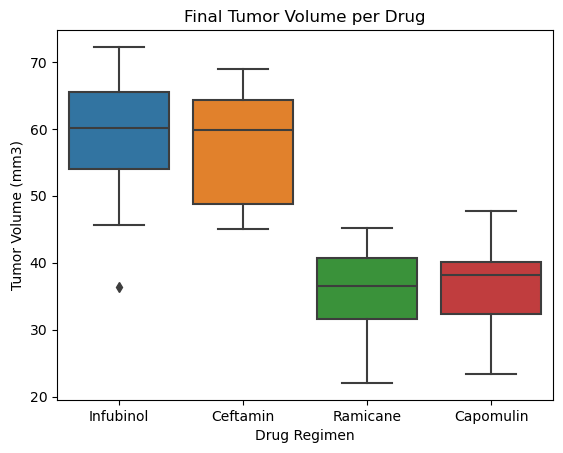

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=df3, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Drug")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
